In [20]:
# Import libraries

# Math stuff
import numpy as np
import math

# Plotting stuff
import matplotlib.pyplot as plt
import matplotlib.animation

# ODE stuff
from scipy.integrate import solve_ivp
%matplotlib inline


In [35]:
# Set up the information needed to solve the initial value problem

z0 = np.zeros(6); #initialize to zero for good measure.

#*************

# TODO HERE: Fill z0 with the necessary initial conditions data
# see the comments in dynamics_function for order of variables in the z vector

#z0 = [???]

z0 [0] = 0.0  #x_0 (inital position of PROJECTILE)
z0 [1] = 0.0  #y_0 (inital position of PROJECTILE)
z0 [2] = 2.0  #x-velocity (inital)
z0 [3] = 20.0 #y-velocity (inital)
z0 [4] = 1.5  #x_0 (inital position of TARGET)
z0 [5] = -1.5 #y_0 (inital position of TARGET)


# Dynamics function for the first order system of ODEs describing projectile and target
def dynamics_function(t, z):
    
    # The dynamics function takes time t and vector z, and 
    # returns the resulting vector of derivative values given by z' (i.e., dz/dt)
    
    #the entries of the incoming z vector will contain the following data
    #z[0] = x-position of projectile, x(t)
    #z[1] = y-position of projectile, y(t)
    #z[2] = x-velocity of projectile, x'(t)
    #z[3] = y-velocity of projectile, y'(t)
    #z[4] = x-position of target, p(t)
    #z[5] = x-velocity of target, p'(t)
    
    #initialize the z' vector of the appropriate length, but with zeros
    dzdt = np.zeros(6);
    
    #*************
   
    #TODO HERE: Fill dzdt with the necessary derivative data to complete the dynamics function.
    
    # returns the resulting vector of derivative values given by z' (i.e., dz/dt)
    #dzdt = dz/dt = [???]
    c = 0.2
    m = 2.0
    w = -0.6
    g = 9.81

    def Vrel(X1,Y1):
        retval = math.sqrt( (X1 - w)**2 + (Y1)**2 )
        return retval

    #dzdt = dz/dt 
    dzdt [0] = z[2]  
    dzdt [1] = z[3]  
    dzdt [2] = (-1) * ((c * Vrel(z[2],z[3])) / m ) * (z[2] - w) 
    dzdt [3] = (-g) - ( (c * Vrel(z[2],z[3])) / m ) * z[3]
    dzdt [4] = z[5]
    dzdt [5] = (-4) * math.pi * (z[4] - 1.5)
    #*************
    
    # return the vector of derivative data (for SciPy's solver to use.
    return dzdt;
        


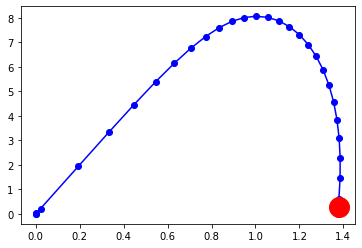

In [40]:
# We'll also define an "event function" to terminate the simulation 
# when the projectile hits the ground (y=0).
# The IVP solver will check this condition behind the scenes for us.
def ground_event(t,z):
    return z[1] #evaluate the y value
ground_event.terminal = True #halt on impact
ground_event.direction = -1 #only count positive-to-negative crossings of the height (y)

# Specify the timespan for simulation. We simulate from 0 to 5 (unless an event happens first!)
tspan = [0, 5] 

# Below we call the SciPy numerical IVP solver to actually solve the problem
# Notice that it takes in the dynamics function and the initial conditions z0
# It then calculates a vector of discrete times, sol.t, 
# and corresponding vectors of discrete solution data sol.y
# It uses adaptive timestepping internally - but we'll limit the step size to 0.1 so we see plenty of steps
sol = solve_ivp(dynamics_function, tspan, z0, max_step = 0.1, events = ground_event)

# Display the result as a static image, for quicker debugging
y_target = np.zeros_like(sol.y[4])
plt.plot(sol.y[0], sol.y[1], 'b-o')
plt.plot(sol.y[4][-1], y_target[-1]+0.3, 'ro', markersize=20)
plt.show()

#print (sol)

RuntimeError: Requested MovieWriter (ffmpeg) not available

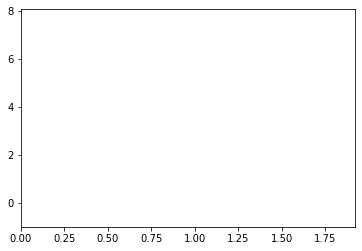

In [30]:
#display the result as an animation, to enjoy higher amounts of fun
t = sol.y[0] 
x = sol.y[1] 

# set up the figure
fig, ax = plt.subplots()
ax.axis([min(t),max(max(t),max(sol.y[4])),min(x)-1,max(x)])

#create the objects to be plotted, initially nothing
l, = ax.plot([],[])
dots, = ax.plot([],[], 'g.')
target, = ax.plot([],[], 'ro',markersize=20)

#set up the animation; i.e., change the plotted data on each indexed frame
def animate(i):
    l.set_data(t[:i], x[:i])
    dots.set_data(t[:i], x[:i])
    #pig.set_data(sol.y[4][:i], y_target[:i]+0.3) #show all frames of the target
    target.set_data(sol.y[4][i], y_target[i]+0.3) #show just the most recent

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
#HTML(ani.to_jshtml()) # try to use javascript player
HTML(ani.to_html5_video())  # try to use html5 video player
